In [1]:
from matplotlib import pyplot as plt
import csv
import pandas as pd
import networkx as nx
from collections import defaultdict


from utils import load_maps, load_df, display_dictionary,haversine, get_coord, get_distance

In [2]:
ATTRACTIONS_FNAME = "disneyland_attractions.csv"
ATTRACTIONS_EDGES_FNAME = "attractions_edges.csv"
    

In [3]:
# attractions_map_rotated = load_maps(ATTRACTIONS_FNAME, True)
attractions_map = load_maps(ATTRACTIONS_FNAME, False)


33.8132930507749 33.8132930507749
33.81202360459952 33.81202360459952
33.8125924 33.8125924
33.81223840000001 33.81223840000001
33.81371392734714 33.81371392734714
33.8153253 33.8153253
33.812481 33.812481
33.81024553687782 33.81024553687782
33.81514947861604 33.81514947861604
33.8137054 33.8137054
33.8127688 33.8127688
33.81112055096432 33.81112055096432
33.81108117085761 33.81108117085761
33.8152241 33.8152241
33.8152072 33.8152072
33.8102333 33.8102333
33.8117229 33.8117229
33.81180740175085 33.81180740175085
33.8111657 33.8111657
33.8146006 33.8146006
33.81440664772209 33.81440664772209
33.8114049 33.8114049
33.81339039999999 33.81339039999999
33.8134952 33.8134952
33.8107343802203 33.8107343802203
33.81059829734667 33.81059829734667
33.8122864 33.8122864
33.8130703 33.8130703
33.81548 33.81548
33.8149359 33.8149359
33.8156031 33.8156031
33.81266704406848 33.81266704406848
33.8133746 33.8133746
33.8131133 33.8131133
33.8133526 33.8133526
33.81204589999999 33.81204589999999
33.81123

In [4]:
RAIL_ROAD_ENTRANCE_ID = "0BF5D5A0A713B6B6A081"
MINNIES_HOUSE_ID = "0D8D702F9D13A7C3A0D4"
RAIL_ROAD_TOMORROWLAND_ID = "005DCC8A8413B6B56EFF"

SW_LAUNCH_BAY = "0CEB5828ED13A7C449E7"
SPACE_MOUNTAIN_ID = "06B1424A4613A7C17094"
SW_TOURS = "08F6B05F6813A7C4734D"


FORTUNE_TELLER_MST_ID = "0AB31AE41D13B6BB8A9A"
TIKI_ROOM_ID = "024911581213A7A7887A"
CASTLE_ID = "0ED9128B2213C25E7840"
ASTRO_ORBITOR_ID = "01A126989313B0A7AA52"

BUZZ_RIDE = "0E8EB1CD7613A7C4569F"


WINNIE_POOH = "0A8B71CAD913A7BD8AA9"
SW_ENTRANCE_ADV_LAND = "0B76231CE813D58AA419"
SW_ENTRANCE_FANTASY_LAND = "045BFCC4E813D58E7955"
SW_ENTRANCE_FRONTIER_LAND = "02E9209DE313D58F29B2"
DAVY_CROC = "0CC239AEC813B172106A"

RISE_RESISTANCE = "00E1B5429A13C260BC96"
SMUGGLERS_RUN = "00C399D54913C25A1A98"

STORY_BOOK = "0F27749CE713A7C2EBF6"
SMALL_WORLD = "0600C026F613A7C19D77"

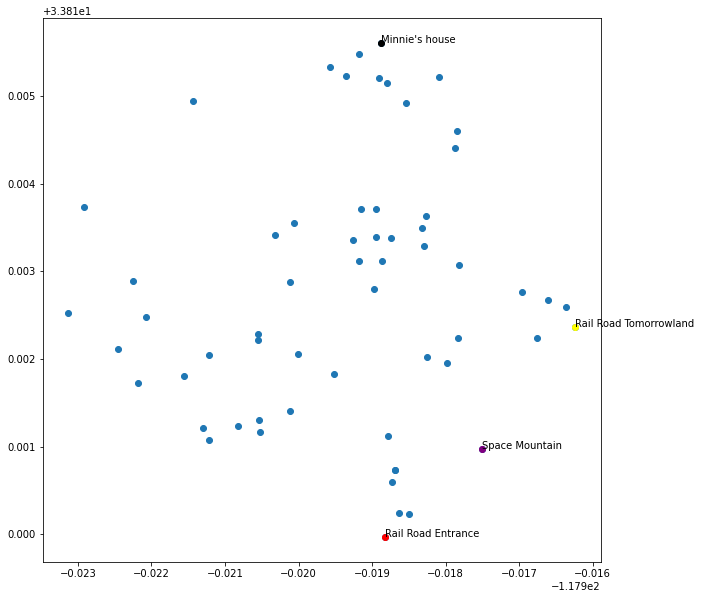

In [5]:

# attractions_map
display_dictionary(attractions_map)

In [6]:



  

    
# def generate_edges(mymap, max_distance):
    
#     for key,value in mymap.items()



In [7]:
get_distance(MINNIES_HOUSE_ID, RAIL_ROAD_ENTRANCE_ID, attractions_map)

0.6265071680190027

In [8]:
#80 is the best
edges = set()
max_distance = 80
for k1,v1 in attractions_map.items():
    for k2,v2 in attractions_map.items():
       
        if k1 == k2:
            continue
    
        source = min(k1, k2)
        target = max(k1,k2)
        d = get_distance(source, target , attractions_map)*1000
        if d <= max_distance:
            edges.add( (source, target))

    
    
       

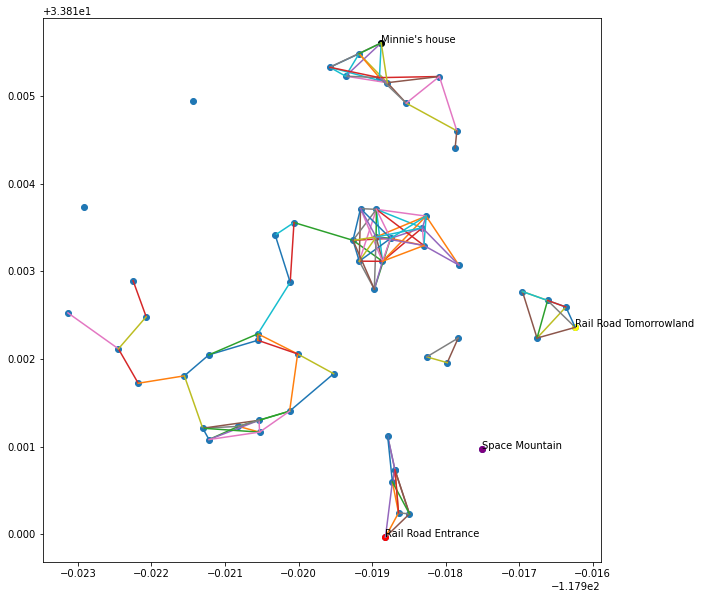

In [9]:
display_dictionary(attractions_map, edges)

128
144


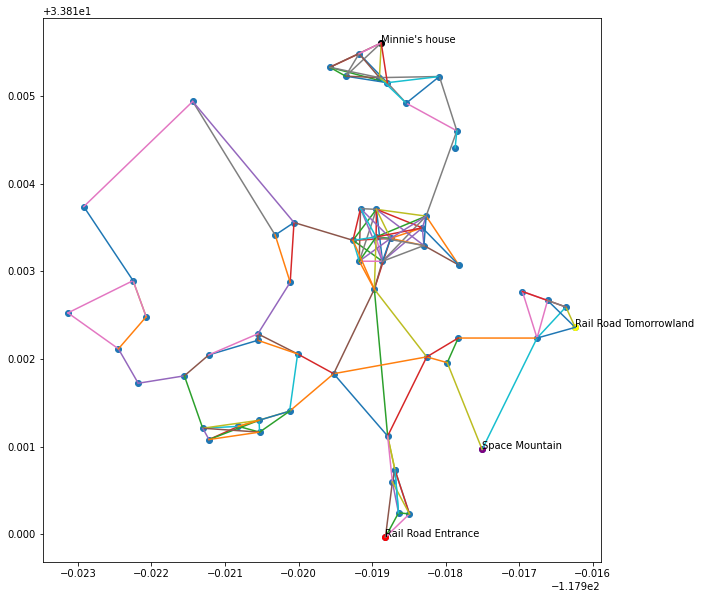

In [11]:
hard_coded_edges = set()

hard_coded_edges.add( (SPACE_MOUNTAIN_ID,SW_LAUNCH_BAY )   )
hard_coded_edges.add( (SPACE_MOUNTAIN_ID, SW_TOURS)   )


hard_coded_edges.add( (BUZZ_RIDE,SW_LAUNCH_BAY )   )

# WINNIE_POOH = "0A8B71CAD913A7BD8AA9"
# SW_ENTRANCE_ADV_LAND = "0B76231CE813D58AA419"
# SW_ENTRANCE_FANTASY_LAND = "045BFCC4E813D58E7955"
# SW_ENTRANCE_FRONTIER_LAND = "02E9209DE313D58F29B2"
#DAVY_CROC = "0CC239AEC813B172106A"


# STORY_BOOK_ "0F27749CE713A7C2EBF6"
# SMALL_WORLD = "0600C026F613A7C19D77"
hard_coded_edges.add( (STORY_BOOK,SMALL_WORLD )   )


hard_coded_edges.add( (RISE_RESISTANCE,SMUGGLERS_RUN )   )
hard_coded_edges.add( (RISE_RESISTANCE,SW_ENTRANCE_FRONTIER_LAND )   )


hard_coded_edges.add( (SW_ENTRANCE_FANTASY_LAND,SMUGGLERS_RUN )   )
hard_coded_edges.add( (SW_ENTRANCE_ADV_LAND,SMUGGLERS_RUN )   )


hard_coded_edges.add( (DAVY_CROC,SW_ENTRANCE_FRONTIER_LAND )   )
hard_coded_edges.add( (WINNIE_POOH,SW_ENTRANCE_FRONTIER_LAND )   )




hard_coded_edges.add( (FORTUNE_TELLER_MST_ID,TIKI_ROOM_ID )   )
hard_coded_edges.add( (FORTUNE_TELLER_MST_ID, CASTLE_ID)   )
hard_coded_edges.add( (FORTUNE_TELLER_MST_ID, ASTRO_ORBITOR_ID)   )

hard_coded_edges.add( (TIKI_ROOM_ID, CASTLE_ID)   )
hard_coded_edges.add( (TIKI_ROOM_ID, ASTRO_ORBITOR_ID)   )

hard_coded_edges.add( (CASTLE_ID, ASTRO_ORBITOR_ID)   )


print(len(edges))
edges = edges.union( hard_coded_edges )
print(len(edges))

display_dictionary(attractions_map, edges)